In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score,classification_report
import os
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv("../input/water-potability/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Missing Value Analysis**


 ***The missing values count of each column in the data frame is shown below.***
 
 ***Missing values are replaced for each column by the mean of the class to which that sample belongs.***

In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df = df.fillna(df.groupby('Potability').transform('mean'))

# **Data Analysis**

* In order to find relationship type(weak,moderate,strong), for each column pearson_coefficient and p_values were calculated.
* Threshold value for determining significance is 0.05.

***If p_value<0.05 there is a linear relationship between two varaiables (statistically significant)***

***If p_value>0.05 there is no linear relationship between two varaiables (not statistically significant)***
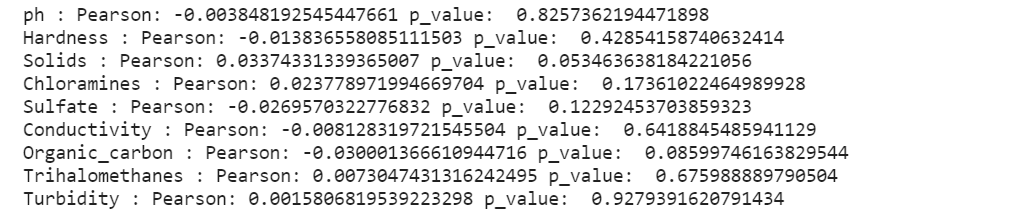


**Visualization of relationship between variables**

Regplot function that is inside the seaborn library is used for the visualization of relationships.
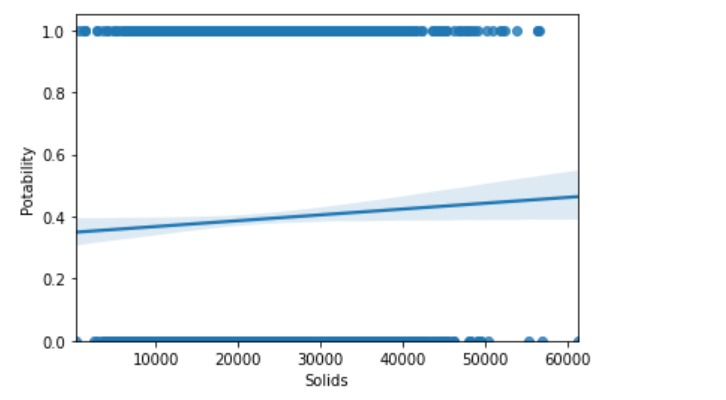

*According to this image we can say there is no linear relationship between Solids feature and Potability.*

(0.0, 1.05)

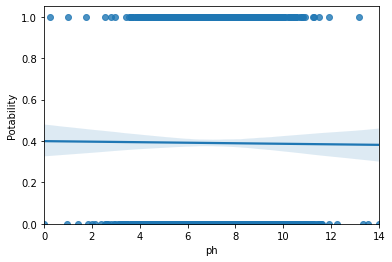

In [5]:
sns.regplot(x="ph", y="Potability", data=df)
plt.ylim(0,)

(0.0, 1.05)

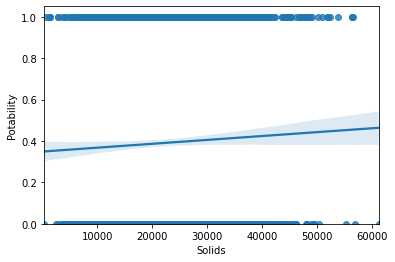

In [6]:
sns.regplot(x="Solids", y="Potability", data=df)
plt.ylim(0,)

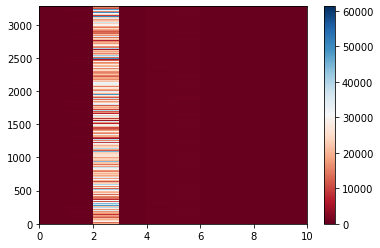

In [7]:
plt.pcolor(df, cmap='RdBu')
plt.colorbar()
plt.show()

In [8]:

for i,j  in enumerate(df.columns):
    pearson_coefficient, p_val = stats.pearsonr(df[str(j)], df['Potability'])
    print(str(j),":","Pearson:",pearson_coefficient,'p_value: ',p_val)


ph : Pearson: -0.003848192545447661 p_value:  0.8257362194471898
Hardness : Pearson: -0.013836558085111503 p_value:  0.42854158740632414
Solids : Pearson: 0.03374331339365007 p_value:  0.053463638184221056
Chloramines : Pearson: 0.023778971994669704 p_value:  0.17361022464989928
Sulfate : Pearson: -0.0269570322776832 p_value:  0.12292453703859323
Conductivity : Pearson: -0.008128319721545504 p_value:  0.6418845485941129
Organic_carbon : Pearson: -0.030001366610944716 p_value:  0.08599746163829544
Trihalomethanes : Pearson: 0.0073047431316242495 p_value:  0.675988889790504
Turbidity : Pearson: 0.0015806819539223298 p_value:  0.9279391620791434
Potability : Pearson: 0.9999999999999958 p_value:  0.0


# Classification

**Classifiers:**
* Decision Tree
* Naive Bayes
* Logistic Regression
* GradientBoosting
* Random Forest

In [9]:
X=np.asarray(df.drop(['Potability'],axis=1))
y=np.asarray(df['Potability'])

In [10]:

le = preprocessing.LabelEncoder()
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

y=le.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

***Decision Tree Classifier***

In [12]:

classifier=tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print(accuracy_score(y_test,predictions))
print(precision_score(y_test,predictions))

0.7347560975609756
0.6434426229508197


***Naive Bayes Classifier***

In [13]:

model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(accuracy_score(y_test, predicted))
print(precision_score(y_test, predicted,average='micro'))

print(classification_report(y_test, predicted))

0.6310975609756098
0.6310975609756098
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       412
           1       0.51      0.22      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.55      0.53       656
weighted avg       0.60      0.63      0.58       656



***Logistic Regression***

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, pred))


Accuracy score:  0.6280487804878049


***Gradient Boosting***

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=30,max_depth=2,random_state=0)
gb.fit(X_train, y_train)
predicted = gb.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, predicted))
print("Precision score: ",precision_score(y_test, predicted))
print(classification_report(y_test, predicted))

Accuracy score:  0.7652439024390244
Precision score:  0.9411764705882353
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       412
           1       0.94      0.39      0.55       244

    accuracy                           0.77       656
   macro avg       0.84      0.69      0.70       656
weighted avg       0.81      0.77      0.73       656



***Random Forest***

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)

random_forest.fit(X_train, y_train)
prediction=random_forest.predict(X_test)
print("Accuracy  score: ",accuracy_score(y_test, prediction))
print("Precision score: ",precision_score(y_test, prediction))
print(classification_report(y_test, prediction))


Accuracy  score:  0.8109756097560976
Precision score:  0.8225806451612904
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       412
           1       0.82      0.63      0.71       244

    accuracy                           0.81       656
   macro avg       0.81      0.77      0.79       656
weighted avg       0.81      0.81      0.80       656



In [17]:
feature_imp = pd.Series(random_forest.feature_importances_,index=df.columns[0:9]).sort_values(ascending=False)
feature_imp

Sulfate            0.287063
ph                 0.185761
Hardness           0.089865
Chloramines        0.083976
Solids             0.080604
Trihalomethanes    0.072532
Organic_carbon     0.070752
Conductivity       0.067456
Turbidity          0.061991
dtype: float64

# Classifier Evaluation

* **Decision Tree**: *Accuracy:* 73.47, *Precision:* 64.7
* **Naive Bayes**: *Accuracy:* 63.1, *Precision:* 63.1
* **Logistic Regression**: *Accuracy:* 62.8
* **Gradient Boosting**: *Accuracy:* 76.5, *Precision:* 94.1
* **Random Forest**: *Accuracy:* 81.09, *Precision:* 82.25